### Import Required Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns',None)

import warnings
warnings.filterwarnings(action='ignore')

### Import Data

In [2]:
train = pd.read_csv('Train_dataset.csv')
train.shape

(3493, 34)

In [3]:
test = pd.read_csv('Test_dataset.csv')
test.shape

(500, 33)

In [4]:
reg = test['Registration Number']

In [5]:
set(test.columns)-set(train.columns)

{'Endoresed By'}

In [6]:
test['Endorsed By'] = test['Endoresed By']

test.drop('Endoresed By',axis=1,inplace=True)

In [7]:
df = pd.concat([train,test],axis=0)

## Feature Engineering

In [8]:
df.duplicated().sum()

0

In [9]:
df.isna().sum()

Registration Number                 0
Annual Turnover                   500
Cuisine                             0
City                                0
Restaurant Location                 0
Opening Day of Restaurant           0
Facebook Popularity Quotient       99
Endorsed By                         0
Instagram Popularity Quotient      56
Fire Audit                          0
Liquor License Obtained             0
Situated in a Multi Complex         0
Dedicated Parking                   0
Open Sitting Available              0
Resturant Tier                     49
Restaurant Type                     0
Restaurant Theme                    0
Restaurant Zomato Rating            0
Restaurant City Tier                0
Order Wait Time                     0
Staff Responsivness                 0
Value for Money                     0
Hygiene Rating                      0
Food Rating                         0
Overall Restaurant Rating         246
Live Music Rating                 867
Comedy Gigs 

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3993 entries, 0 to 499
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Registration Number            3993 non-null   int64  
 1   Annual Turnover                3493 non-null   float64
 2   Cuisine                        3993 non-null   object 
 3   City                           3993 non-null   object 
 4   Restaurant Location            3993 non-null   object 
 5   Opening Day of Restaurant      3993 non-null   object 
 6   Facebook Popularity Quotient   3894 non-null   float64
 7   Endorsed By                    3993 non-null   object 
 8   Instagram Popularity Quotient  3937 non-null   float64
 9   Fire Audit                     3993 non-null   int64  
 10  Liquor License Obtained        3993 non-null   int64  
 11  Situated in a Multi Complex    3993 non-null   int64  
 12  Dedicated Parking              3993 non-null   int64  

### Registration Number

In [11]:
df.drop('Registration Number',axis=1,inplace=True)

### Annual Turnover

<Axes: ylabel='Density'>

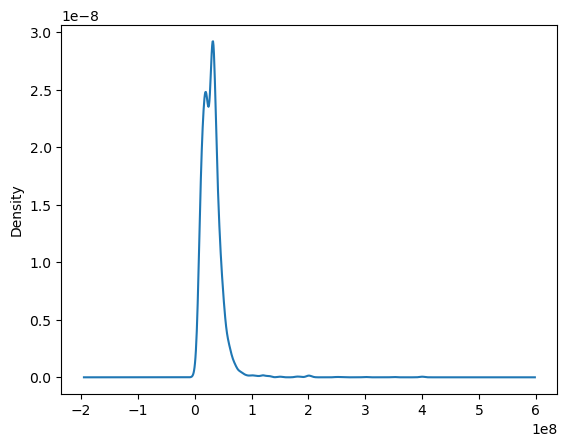

In [12]:
df['Annual Turnover'].plot(kind='kde')

In [13]:
df['Annual Turnover'].value_counts()

Annual Turnover
30000000.0     254
18000000.0     206
20000000.0     178
32500000.0     164
12000000.0     149
              ... 
87000000.0       1
205000000.0      1
14400000.0       1
132000000.0      1
121000000.0      1
Name: count, Length: 173, dtype: int64

In [14]:
df['Annual Turnover'].describe()

count    3.493000e+03
mean     3.072571e+07
std      2.165125e+07
min      3.500000e+06
25%      1.800000e+07
50%      3.000000e+07
75%      3.700000e+07
max      4.000000e+08
Name: Annual Turnover, dtype: float64

In [15]:
df['Annual Turnover'].isna().sum()

500

### Cuisine

<Axes: xlabel='Cuisine'>

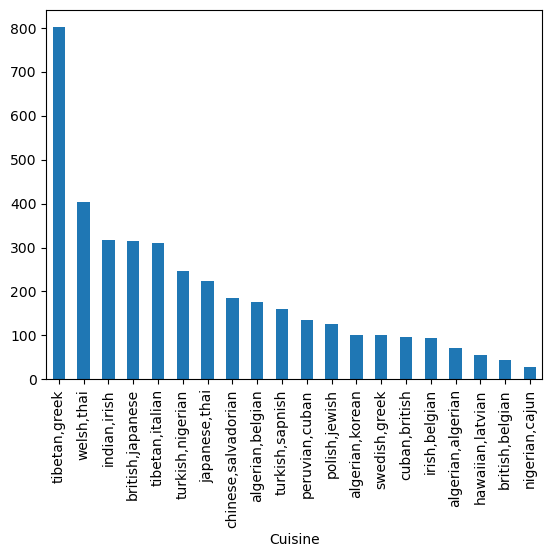

In [16]:
df['Cuisine'].value_counts().plot(kind='bar')

In [17]:
df['Cuisine'].isna().sum()

0

In [18]:
df = pd.concat([df,pd.get_dummies(df['Cuisine'],dtype='int')],axis=1)
df.drop('Cuisine',axis=1,inplace=True)

### City

In [19]:
df.City.value_counts()

City
Bangalore       627
-1              461
Noida           368
Hyderabad       335
Pune            290
               ... 
BAngalore         1
india             1
Asansol           1
Tirunelvelli      1
shahibabad        1
Name: count, Length: 334, dtype: int64

In [20]:
df = pd.concat([df,pd.get_dummies(df['City'],dtype='int')],axis=1)
df.drop('City',axis=1,inplace=True)

### Restaurant Location

In [21]:
df['Restaurant Location'].value_counts()

Restaurant Location
Near Party Hub       3036
Near Business Hub     957
Name: count, dtype: int64

In [22]:
df = pd.concat([df,pd.get_dummies(df['Restaurant Location'],dtype='int')],axis=1)
df.drop('Restaurant Location',axis=1,inplace=True)

### Opening Day of Restaurant

In [23]:
df['Opening Day of Restaurant']

0      14-02-2009
1      29-09-2008
2      30-07-2011
3      30-11-2008
4      22-02-2010
          ...    
495    08-09-2009
496    20-06-2007
497    19-06-2010
498    23-08-2012
499    10-03-2010
Name: Opening Day of Restaurant, Length: 3993, dtype: object

In [24]:
df['Opening Day of Restaurant'] = pd.to_datetime(df['Opening Day of Restaurant'])

In [25]:
df['Opening Day of Restaurant'].describe()

count                             3993
mean     2009-12-01 23:54:13.794139648
min                1996-10-25 00:00:00
25%                2008-11-13 00:00:00
50%                2010-03-03 00:00:00
75%                2011-03-10 00:00:00
max                2016-05-22 00:00:00
Name: Opening Day of Restaurant, dtype: object

In [26]:
df['Opening Day of Restaurant'].isna().sum()

0

In [27]:
def bucket5(a):
    if a <= df['Opening Day of Restaurant'].quantile(0.20):
        return 'Oldest'
    elif a > df['Opening Day of Restaurant'].quantile(0.20) and a <= df['Opening Day of Restaurant'].quantile(0.40):
        return 'Old'
    elif a > df['Opening Day of Restaurant'].quantile(0.40) and a <= df['Opening Day of Restaurant'].quantile(0.60):
        return 'New'
    elif a > df['Opening Day of Restaurant'].quantile(0.60) and a <= df['Opening Day of Restaurant'].quantile(0.80):
        return 'New'
    elif a > df['Opening Day of Restaurant'].quantile(0.80):
        return 'Newest'

In [28]:
df['Opening Day of Restaurant'] = df['Opening Day of Restaurant'].apply(bucket5)

In [29]:
df = pd.concat([df,pd.get_dummies(df['Opening Day of Restaurant'],dtype='int')],axis=1)
df.drop('Opening Day of Restaurant',axis=1,inplace=True)

### Facebook Popularity Quotient

<Axes: ylabel='Density'>

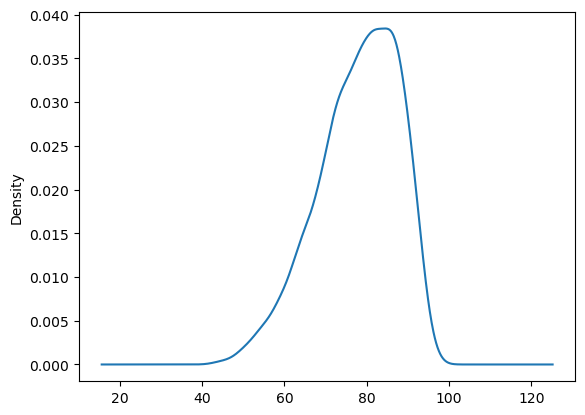

In [30]:
df['Facebook Popularity Quotient'].plot(kind='kde')

In [31]:
df['Facebook Popularity Quotient'].isna().sum()

99

In [32]:
df['Facebook Popularity Quotient'].describe()

count    3894.000000
mean       77.887678
std         9.861789
min        43.000000
25%        71.660000
50%        79.000000
75%        85.667500
max        97.760000
Name: Facebook Popularity Quotient, dtype: float64

In [33]:
def bucket6(x):
    if x < 71:
        return 'b6 Low'
    elif x >= 71 and x < 79:
        return 'b6 Med'
    elif x >= 79 and x < 85:
        return 'b6 High'
    elif x >= 85:
        return 'b6 V.High'
    else:
        return 'b6 Null'

In [34]:
df['Facebook Popularity Quotient'] = df['Facebook Popularity Quotient'].apply(bucket6)

In [35]:
df = pd.concat([df,pd.get_dummies(df['Facebook Popularity Quotient'],dtype='int')],axis=1)
df.drop('Facebook Popularity Quotient',axis=1,inplace=True)

### Endorsed By

In [36]:
df['Endorsed By'].value_counts()

Endorsed By
Not Specific        2260
Tier A Celebrity    1696
Local Celebrity       37
Name: count, dtype: int64

In [37]:
df['Endorsed By'].isna().sum()

0

In [38]:
df['Endorsed By'] = df['Endorsed By'].map({'Not Specific':0, 'Local Celebrity':1, 'Tier A Celebrity':2})

### Instagram Popularity Quotient

In [39]:
df['Instagram Popularity Quotient'].describe()

count    3937.000000
mean       74.448954
std        10.990665
min        40.000000
25%        66.000000
50%        74.330000
75%        82.600000
max        98.700000
Name: Instagram Popularity Quotient, dtype: float64

In [40]:
df['Instagram Popularity Quotient'].isna().sum()

56

<Axes: ylabel='Density'>

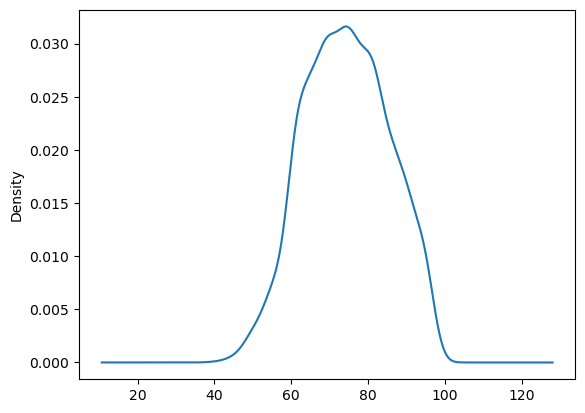

In [41]:
df['Instagram Popularity Quotient'].plot(kind='kde')

In [42]:
df['Instagram Popularity Quotient'].describe()

count    3937.000000
mean       74.448954
std        10.990665
min        40.000000
25%        66.000000
50%        74.330000
75%        82.600000
max        98.700000
Name: Instagram Popularity Quotient, dtype: float64

In [43]:
def bucket7(x):
    if x < 66:
        return 'b7 Low'
    elif x >= 66 and x < 74:
        return 'b7 Med'
    elif x >= 74 and x < 82:
        return 'b7 High'
    elif x >= 82:
        return 'b7 V.High'
    else:
        return 'b7 Null'

In [44]:
df['Instagram Popularity Quotient'] = df['Instagram Popularity Quotient'].apply(bucket7)

In [45]:
df = pd.concat([df,pd.get_dummies(df['Instagram Popularity Quotient'],dtype='int')],axis=1)
df.drop('Instagram Popularity Quotient',axis=1,inplace=True)

### Fire Audit

In [46]:
df['Fire Audit'].value_counts()

Fire Audit
1    3162
0     831
Name: count, dtype: int64

In [47]:
df['Fire Audit'].isna().sum()

0

### Liquor License Obtained

In [48]:
df['Liquor License Obtained'].value_counts()

Liquor License Obtained
1    3945
0      48
Name: count, dtype: int64

In [49]:
df['Liquor License Obtained'].isna().sum()

0

### Situated in a Multi Complex

In [50]:
df['Situated in a Multi Complex'].value_counts()

Situated in a Multi Complex
1    3217
0     776
Name: count, dtype: int64

In [51]:
df['Situated in a Multi Complex'].isna().sum()

0

### Dedicated Parking

In [52]:
df['Dedicated Parking'].value_counts()

Dedicated Parking
1    3205
0     788
Name: count, dtype: int64

In [53]:
df['Dedicated Parking'].isna().sum()

0

### Open Sitting Available

In [54]:
df['Open Sitting Available'].value_counts()

Open Sitting Available
1    3197
0     796
Name: count, dtype: int64

In [55]:
df['Open Sitting Available'].isna().sum()

0

### Resturant Tier

In [56]:
df['Resturant Tier'].value_counts()

Resturant Tier
2.0    3657
1.0     287
Name: count, dtype: int64

In [57]:
df['Resturant Tier'].isna().sum()

49

In [58]:
df['Resturant Tier'].fillna(df['Resturant Tier'].mode()[0],inplace=True)

In [59]:
df['Resturant Tier'] = df['Resturant Tier'].map({2.0:0,1.0:1})

### Restaurant Type

In [60]:
df['Restaurant Type'].value_counts()

Restaurant Type
Bar                         3695
Caffee                       243
Gastro Bar                    53
Buffet/Family Restaurant       2
Name: count, dtype: int64

In [61]:
df['Restaurant Type'].isna().sum()

0

In [62]:
df = pd.concat([df,pd.get_dummies(df['Restaurant Type'],dtype='int')],axis=1)
df.drop('Restaurant Type',axis=1,inplace=True)

### Restaurant Theme

In [63]:
df['Restaurant Theme'].value_counts()

Restaurant Theme
Arabian      1592
Greek        1163
90's          659
Nature        201
Parsi         121
Chinese        82
Molino         29
Delicio        27
English        20
Belise         15
Moonrise       13
Downtown       10
Mise En         9
Carbone         6
TheGem          6
Petit           5
Marco           5
Picante         4
Benedicta       4
Umami           3
Savory          2
Cafepro         2
Bettaso         2
Ambiance        2
Resca           2
Spoon           1
Cinnamon        1
LaCuisine       1
Italica         1
Flavors         1
Bakery          1
Piquant         1
Sage            1
Grand           1
Name: count, dtype: int64

In [64]:
def theme(a):
    if a == 'Arabian':
        return 'Arabian'
    elif a == 'Greek':
        return 'Greek'
    elif a == '''90's''':
        return '90s'
    elif a == 'Nature':
        return 'Nature'
    elif a == 'Parsi':
        return 'Parsi'
    elif a == 'Chinese':
        return 'Chinese'
    elif a == 'Molino':
        return 'Molino'
    elif a == 'Delicio':
        return 'Delicio'
    elif a == 'English':
        return 'English'
    elif a == 'Belise':
        return 'Belise'
    elif a == 'Moonrise':
        return 'Moonrise'
    else:
        return 'Other'

In [65]:
df['Restaurant Theme'] = df['Restaurant Theme'].apply(theme)

In [66]:
df = pd.concat([df,pd.get_dummies(df['Restaurant Theme'],dtype='int')],axis=1)
df.drop('Restaurant Theme',axis=1,inplace=True)

### Restaurant Zomato Rating

In [67]:
df['Restaurant Zomato Rating'].value_counts()

Restaurant Zomato Rating
3    1877
2    1416
4     483
1     161
5      43
0      13
Name: count, dtype: int64

In [68]:
df['Restaurant Zomato Rating'].isna().sum()

0

### Restaurant City Tier

In [69]:
df['Restaurant City Tier'].value_counts()

Restaurant City Tier
0    2794
1    1199
Name: count, dtype: int64

In [70]:
df['Restaurant City Tier'].isna().sum()

0

### Order Wait Time

In [71]:
df['Order Wait Time'].value_counts()

Order Wait Time
8     426
5     417
10    404
4     403
6     402
2     397
7     397
1     397
9     375
3     375
Name: count, dtype: int64

In [72]:
df['Order Wait Time'].isna().sum()

0

In [73]:
def reverse(a):
    return 10-a

In [74]:
df['Order Wait Time'] = df['Order Wait Time'].apply(reverse)

### Staff Responsivness

In [75]:
df['Staff Responsivness'].value_counts()

Staff Responsivness
5    1304
4    1254
3     649
6     585
7     136
2      53
8      11
1       1
Name: count, dtype: int64

In [76]:
df['Staff Responsivness'].isna().sum()

0

### Value for Money

In [77]:
df['Value for Money'].value_counts()

Value for Money
5    1562
4    1388
6     524
3     464
2      42
7      12
1       1
Name: count, dtype: int64

In [78]:
df['Value for Money'].isna().sum()

0

### Hygiene Rating

In [79]:
df['Hygiene Rating'].value_counts()

Hygiene Rating
5    1244
4    1062
6     740
3     540
7     208
2     142
8      37
1      18
9       2
Name: count, dtype: int64

In [80]:
df['Hygiene Rating'].isna().sum()

0

### Food Rating

In [81]:
df['Food Rating'].value_counts()

Food Rating
7     696
10    695
5     677
9     664
8     631
6     630
Name: count, dtype: int64

In [82]:
df['Food Rating'].isna().sum()

0

### Overall Restaurant Rating

In [83]:
df['Overall Restaurant Rating'].value_counts()

Overall Restaurant Rating
9.0     1175
10.0     975
7.0      657
8.0      602
6.0      338
Name: count, dtype: int64

In [84]:
df['Overall Restaurant Rating'].isna().sum()

246

In [85]:
df['Overall Restaurant Rating'].describe()

count    3747.000000
mean        8.478249
std         1.289302
min         6.000000
25%         7.000000
50%         9.000000
75%        10.000000
max        10.000000
Name: Overall Restaurant Rating, dtype: float64

In [86]:
def bucket8(x):
    if x == 6:
        return 'b8 Low'
    elif x == 7:
        return 'b8 Med'
    elif x == 8:
        return 'b8 High'
    elif x == 9:
        return 'b8 V.High'
    elif x == 10:
        return 'b8 V.V.High'
    else:
        return 'b8 Null'

In [87]:
df['Overall Restaurant Rating'] = df['Overall Restaurant Rating'].apply(bucket8)

In [88]:
df = pd.concat([df,pd.get_dummies(df['Overall Restaurant Rating'],dtype='int')],axis=1)
df.drop('Overall Restaurant Rating',axis=1,inplace=True)

### Live Music Rating

In [89]:
df['Live Music Rating'].value_counts()

Live Music Rating
4.0    1277
3.0     780
5.0     723
6.0     183
2.0     112
1.0      32
7.0      17
8.0       2
Name: count, dtype: int64

In [90]:
df['Live Music Rating'].isna().sum()

867

In [91]:
def bucket(x):
    if x>=1 and x<=2:
        return 'b1 Low'
    elif x>=3 and x<=4:
        return 'b1 Medium'
    elif x>=5 and x<=6:
        return 'b1 Good'
    elif x>=7 and x<=8:
        return 'b1 Great'
    else:
        return 'b1 Null'

In [92]:
df['Live Music Rating'] = df['Live Music Rating'].apply(bucket)

In [93]:
df = pd.concat([df,pd.get_dummies(df['Live Music Rating'],dtype='int')],axis=1)
df.drop('Live Music Rating',axis=1,inplace=True)

### Comedy Gigs Rating

In [94]:
df['Comedy Gigs Rating'].value_counts()

Comedy Gigs Rating
3.0    518
2.0    317
4.0    221
5.0     47
1.0     35
6.0      2
Name: count, dtype: int64

In [95]:
df['Comedy Gigs Rating'].isna().sum()

2853

In [96]:
def bucket2(x):
    if x>=1 and x<=2:
        return 'b2 Low'
    elif x>=3 and x<=4:
        return 'b2 Medium'
    elif x>=5 and x<=6:
        return 'b2 Good'
    elif x>=7 and x<=8:
        return 'b2 Great'
    else:
        return 'b2 Null'

In [97]:
df['Comedy Gigs Rating'] = df['Comedy Gigs Rating'].apply(bucket2)

In [98]:
df = pd.concat([df,pd.get_dummies(df['Comedy Gigs Rating'],dtype='int')],axis=1)
df.drop('Comedy Gigs Rating',axis=1,inplace=True)

### Value Deals Rating

In [99]:
df['Value Deals Rating'].value_counts()

Value Deals Rating
4.0    319
3.0    317
5.0    145
2.0     94
6.0     20
1.0      4
7.0      2
Name: count, dtype: int64

In [100]:
df['Value Deals Rating'].isna().sum()

3092

In [101]:
def bucket3(x):
    if x>=1 and x<=2:
        return 'b3 Low'
    elif x>=3 and x<=4:
        return 'b3 Medium'
    elif x>=5 and x<=6:
        return 'b3 Good'
    elif x>=7 and x<=8:
        return 'b3 Great'
    else:
        return 'b3 Null'

In [102]:
df['Value Deals Rating'] = df['Value Deals Rating'].apply(bucket3)

In [103]:
df = pd.concat([df,pd.get_dummies(df['Value Deals Rating'],dtype='int')],axis=1)
df.drop('Value Deals Rating',axis=1,inplace=True)

### Live Sports Rating

In [104]:
df['Live Sports Rating'].value_counts()

Live Sports Rating
4.0    90
3.0    88
5.0    29
2.0    22
6.0     5
Name: count, dtype: int64

In [105]:
df['Live Sports Rating'].isna().sum()

3759

In [106]:
def bucket4(x):
    if x>=1 and x<=2:
        return 'b4 Low'
    elif x>=3 and x<=4:
        return 'b4 Medium'
    elif x>=5 and x<=6:
        return 'b4 Good'
    elif x>=7 and x<=8:
        return 'b4 Great'
    else:
        return 'b4 Null'

In [107]:
df['Live Sports Rating'] = df['Live Sports Rating'].apply(bucket4)

In [108]:
df = pd.concat([df,pd.get_dummies(df['Live Sports Rating'],dtype='int')],axis=1)
df.drop('Live Sports Rating',axis=1,inplace=True)

### Ambience

In [109]:
df['Ambience'].value_counts()

Ambience
6.0     783
8.0     752
7.0     685
5.0     428
9.0     403
4.0     401
10.0    184
3.0     167
2.0     103
1.0      34
0.0      28
Name: count, dtype: int64

In [110]:
df['Ambience'].isna().sum()

25

In [111]:
df['Ambience'].describe()

count    3968.000000
mean        6.416583
std         2.046620
min         0.000000
25%         5.000000
50%         7.000000
75%         8.000000
max        10.000000
Name: Ambience, dtype: float64

In [112]:
def bucket9(x):
    if x<5:
        return 'b9 Low'
    elif x>=5 and x<7:
        return 'b9 Medium'
    elif x>=7 and x<8:
        return 'b9 Good'
    elif x>=8:
        return 'b9 Great'
    else:
        return 'b9 Null'

In [113]:
df['Ambience'] = df['Ambience'].apply(bucket9)

In [114]:
df = pd.concat([df,pd.get_dummies(df['Ambience'],dtype='int')],axis=1)
df.drop('Ambience',axis=1,inplace=True)

### Lively

In [115]:
df['Lively'].value_counts()

Lively
8     932
7     906
6     656
9     532
5     406
4     195
10    166
3      99
2      46
0      33
1      22
Name: count, dtype: int64

In [116]:
df['Lively'].isna().sum()

0

### Service

In [117]:
df['Service'].value_counts()

Service
5     949
6     710
4     707
3     454
7     420
2     281
1     171
8     154
0      96
9      46
10      5
Name: count, dtype: int64

In [118]:
df['Service'].isna().sum()

0

### Comfortablility

In [119]:
df['Comfortablility'].value_counts()

Comfortablility
3     746
4     710
2     688
5     509
0     375
1     353
6     331
7     197
8      63
9      14
10      7
Name: count, dtype: int64

In [120]:
df['Comfortablility'].isna().sum()

0

### Privacy

In [121]:
df['Privacy'].value_counts()

Privacy
7     911
6     879
8     659
5     512
9     352
4     320
3     134
2      84
1      49
10     47
0      46
Name: count, dtype: int64

In [122]:
df['Privacy'].isna().sum()

0

### Standardising the Data

In [123]:
num = [ 'Endorsed By','Restaurant Zomato Rating', 'Order Wait Time', 'Staff Responsivness',
        'Value for Money', 'Hygiene Rating', 'Food Rating', 'Lively',
       'Service', 'Comfortablility', 'Privacy']

In [124]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

ss = MinMaxScaler()
df_num_scaled = pd.DataFrame(ss.fit_transform(df[num]),columns=num)

In [125]:
df.reset_index(drop=True,inplace=True)

In [126]:
df = pd.concat([df.drop(num,axis=1),df_num_scaled],axis=1)

### Removing High Variance Factor

In [127]:
num = [ 'Endorsed By','Restaurant Zomato Rating', 'Order Wait Time', 'Staff Responsivness',
        'Hygiene Rating', 'Food Rating',
       'Service', 'Comfortablility', 'Privacy']

In [128]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = []
for i in range(df[num].shape[1]):
    vif.append(variance_inflation_factor(df[num].values,i))

In [129]:
pd.DataFrame(vif,index=df[num].columns).sort_values(by=0)[0:50]

,0
Endorsed By,1.981454
Food Rating,3.029377
Comfortablility,3.279165
Order Wait Time,3.302419
Service,7.897665
Hygiene Rating,10.733074
Restaurant Zomato Rating,11.160818
Privacy,12.416706
Staff Responsivness,12.814315


In [130]:
df.drop(['Lively','Value for Money'],axis=1,inplace=True)

### Model

In [131]:
test = df[df['Annual Turnover'].isna()]

In [132]:
train = df[~df['Annual Turnover'].isna()]

In [133]:
test.drop('Annual Turnover',axis=1,inplace=True)

In [134]:
xtrain = train.drop('Annual Turnover',axis=1)
ytrain = train['Annual Turnover']
xtest = test

In [135]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV

dt = SGDRegressor(random_state=15)
params = {'alpha':[0.0024720],'l1_ratio':[0.05,0.10,0.15]}

gs = GridSearchCV(estimator=dt,param_grid=params,scoring='neg_mean_squared_error',n_jobs=-1,cv=10)
gs.fit(xtrain,ytrain)
gs.best_params_

{'alpha': 0.002472, 'l1_ratio': 0.05}

In [136]:
from sklearn.linear_model import SGDRegressor

dt = SGDRegressor(alpha=0.002472)
dt.fit(xtrain,ytrain)
ypred = dt.predict(xtest)

In [137]:
result = pd.DataFrame(ypred,columns=['Annual Turnover'])

In [138]:
sub = pd.concat([reg,result],axis=1)

In [139]:
sub.to_csv('Submission.csv',index=False)